In [36]:
import matplotlib.pyplot as plt
import cirq_ionq
import random
import cirq


In [37]:
def diffuse(circuit, n, qubits):
    for _ in range(n):
        circuit.append([cirq.H(qubit) for qubit in qubits])
        circuit.append([cirq.X(qubit) for qubit in qubits])
        circuit.append(cirq.Z(qubits[-1]).controlled_by(*qubits[0:-1]))
        circuit.append([cirq.X(qubit) for qubit in qubits])
        circuit.append([cirq.H(qubit) for qubit in qubits])

In [38]:
def build_monster_grover(exponents, nDiffuse, measure):
    qubits = [cirq.NamedQubit(str(ii)) for ii in range(4)]
    circuit = cirq.Circuit()

    # apply H-gates 
    circuit.append([cirq.H(qubit) for qubit in qubits])

    circuit.append(cirq.CZPowGate(exponent = exponents[0])(qubits[0], qubits[1]))
    circuit.append(cirq.CZPowGate(exponent = exponents[1])(qubits[0], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[2])(qubits[0], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[3])(qubits[1], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[4])(qubits[1], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[5])(qubits[2], qubits[3]))

    circuit.append([cirq.X(qubit) for qubit in qubits])
    
    circuit.append(cirq.CZPowGate(exponent = exponents[6])(qubits[0], qubits[1]))
    circuit.append(cirq.CZPowGate(exponent = exponents[7])(qubits[0], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[8])(qubits[0], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[9])(qubits[1], qubits[2]))
    circuit.append(cirq.CZPowGate(exponent = exponents[10])(qubits[1], qubits[3]))
    circuit.append(cirq.CZPowGate(exponent = exponents[11])(qubits[2], qubits[3]))
    
    diffuse(circuit, nDiffuse, qubits)
    
    if measure:
        circuit.append(cirq.measure(*qubits, key = 'r1'))
    
    return circuit

[17.9  4.7  2.8  4.7  0.1  3.  14.9  0.7  4.6  3.3  7.9 17.1  1.7 12.8
  3.6  0.2]


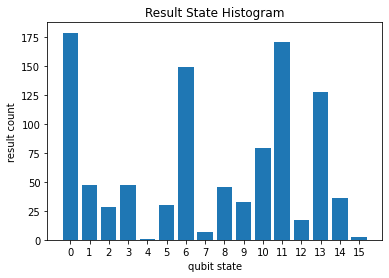

In [55]:
numExponents = 12
numRepititions = 1000
exponents = [random.random() for _ in range(numExponents)]
nDiffuse = 1

# initial circuit
circuit = build_monster_grover(exponents, nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)
cirq.plot_state_histogram(samples, plt.subplot())

counts = cirq.get_state_histogram(samples)
percentages = counts/numRepititions * 100
print(percentages)
# list(cirq.get_state_histogram(samples))
prev_prob_sum = percentages[1]+percentages[7]+percentages[5]+percentages[11]

In [56]:
# account for the number 
threshold = 60 # accept percentage
numIts = 2000
random_sample = [0,1,2,3]
accuracy = []
# print(sum(percentages[0:3]))

In [57]:
# update exponents by a small step randomly
updates = [random.random()/10 - 0.05 for _ in range(len(exponents))]

circuit = build_monster_grover([exponents[ii] + updates[ii] 
                                    for ii in range(numExponents)], nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)

# get the numbers in the range of the samples
list(cirq.get_state_histogram(samples))

prob_sum = percentages[1]+percentages[7]+percentages[5]+percentages[11]

In [59]:
for i in range(numIts):
    
    if(prob_sum >= prev_prob_sum):
        # accept the change and run again
        print(prob_sum)
        accuracy.append((i, prob_sum))
        prev_prob_sum = prob_sum
        exponents = [exponents[ii] + updates[ii] for ii in range(numExponents)]   
    #else:
        # do not accept the change and run again
        
    # update exponents by a small step randomly
    updates = [random.random()/10 - 0.05 for _ in range(len(exponents))]

    circuit = build_monster_grover([exponents[ii] + updates[ii] 
                                    for ii in range(numExponents)], nDiffuse, measure=True)
    s = cirq.Simulator()
    samples = s.run(circuit, repetitions = numRepititions)
    
    # get the numbers in the range of the samples
    counts = cirq.get_state_histogram(samples)
    percentages = counts/numRepititions * 100
    
    prob_sum = percentages[1]+percentages[7]+percentages[5]+percentages[11]
    
print("DONE")

DONE


In [60]:
plt.plot(iterations, accuracy)

NameError: name 'iterations' is not defined

In [49]:
print(exponents)

[1.5465084985155186, 0.010646375574077944, 0.4712997447551397, -0.09422060157888755, 0.3709877962236159, -0.14042879648322282, 0.5144343054771163, -0.13070367699934443, 0.4726505106516852, -0.24364628417776676, 1.1272303799398788, 0.648864043309553]


<AxesSubplot: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

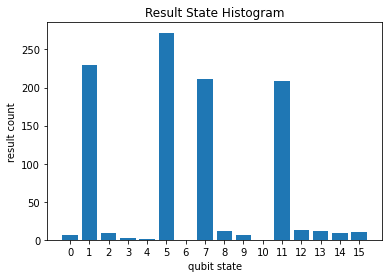

In [50]:
circuit = build_monster_grover(exponents, nDiffuse, measure=True)
s = cirq.Simulator()
samples = s.run(circuit, repetitions = numRepititions)

# get the numbers in the range of the samples
list(cirq.get_state_histogram(samples))
cirq.plot_state_histogram(samples, plt.subplot())